In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
# Load dataset
file_path = r'..\..\..\Datasets\train\balanced\ATB_LTB.csv'
df = pd.read_csv(file_path)

In [3]:
# Extract features and labels
X = df.drop(columns=['TB_Status'])
y = df['TB_Status']

In [4]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['TB_Status'] = y

# Count occurrences of each category
category_counts = Counter(y)

# Create a custom legend with counts
custom_legend_labels = [f"{label} ({count})" for label, count in category_counts.items()]

# Define a color palette with distinct colors for each cluster
unique_labels = df_pca['TB_Status'].unique()
palette = sns.color_palette("tab10", len(unique_labels))  # Generates distinct colors

# Create a dictionary mapping labels to colors
label_color_mapping = {label: color for label, color in zip(unique_labels, palette)}



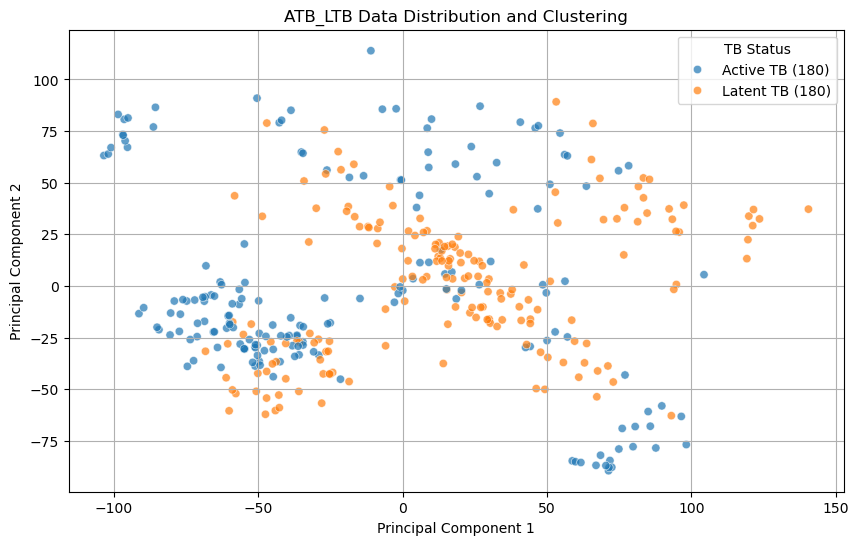

In [5]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='TB_Status', data=df_pca, palette=label_color_mapping, alpha=0.7)

# Customize legend with category names and counts
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, custom_legend_labels, title='TB Status', loc='best')

# Labels and formatting
plt.title('ATB_LTB Data Distribution and Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.show()